# Data Preprocessing for GTZAN Music Genre Dataset

This notebook is dedicated to preprocessing the GTZAN music genre dataset, a widely-used collection of audio tracks for music genre classification. The dataset comprises 1000 audio files, with 100 tracks per genre across 10 genres (blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock). Each track is approximately 30 seconds long. However, inconsistencies in file properties may exist, which could affect feature extraction and machine learning model training. This notebook addresses these issues through exploration and standardization.

## Exploring the Unprocessed Dataset

In [ ]:
# Import necessary modules and set up the working directory
import os, sys
sys.path.append(os.path.abspath('..'))

from scripts.data_preprocessing import *

c:\Users\liulj\Desktop\AI\audio-classification\scripts\explore_dataset.py:84: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
c:\Users\liulj\Desktop\AI\audio-classification\.venv\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing .wav file: ../data/genres\jazz\jazz.00054.wav - 


### Counting Samples per Genre
We start by counting the number of audio files per genre to confirm the dataset's balance."

In [2]:
print("📊 Counting samples...")
genre_counts = count_genre_samples()
print("✅ Genre counts:", genre_counts)

📊 Counting samples...
✅ Genre counts: {'blues': 100, 'classical': 100, 'country': 100, 'disco': 100, 'hiphop': 100, 'jazz': 100, 'metal': 100, 'pop': 100, 'reggae': 100, 'rock': 100}


### Visualizing Genre Distribution
Next, we plot the distribution of samples across genres to visually confirm the balance


📈 Plotting genre distribution...


c:\Users\liulj\Desktop\AI\audio-classification\scripts\explore_dataset.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()), palette="viridis")


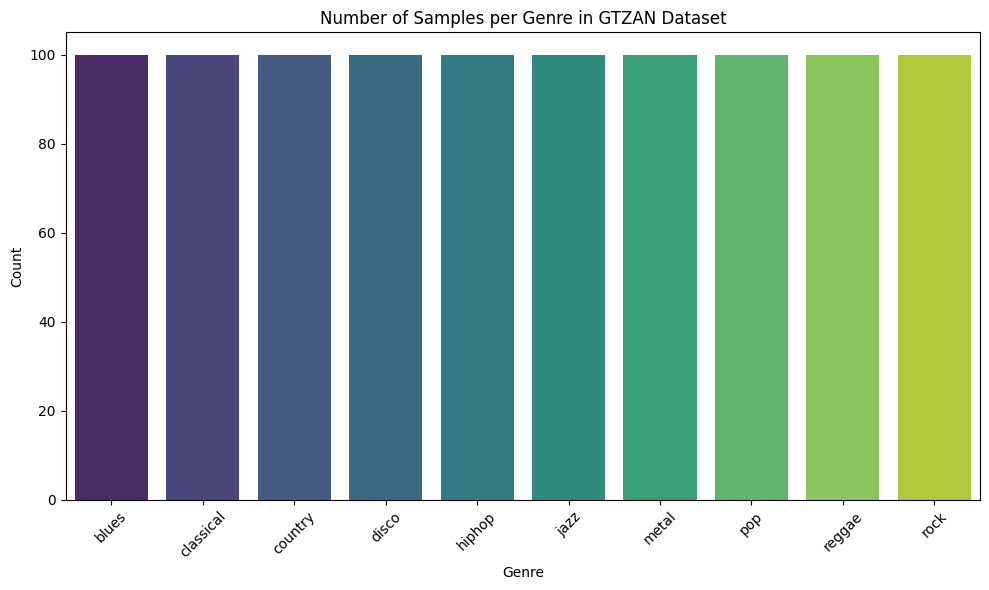

In [3]:
print("\n📈 Plotting genre distribution...")
plot_genre_distribution(genre_counts)

### Plotting random waveform per genre


🎵 Plotting random waveform per genre...


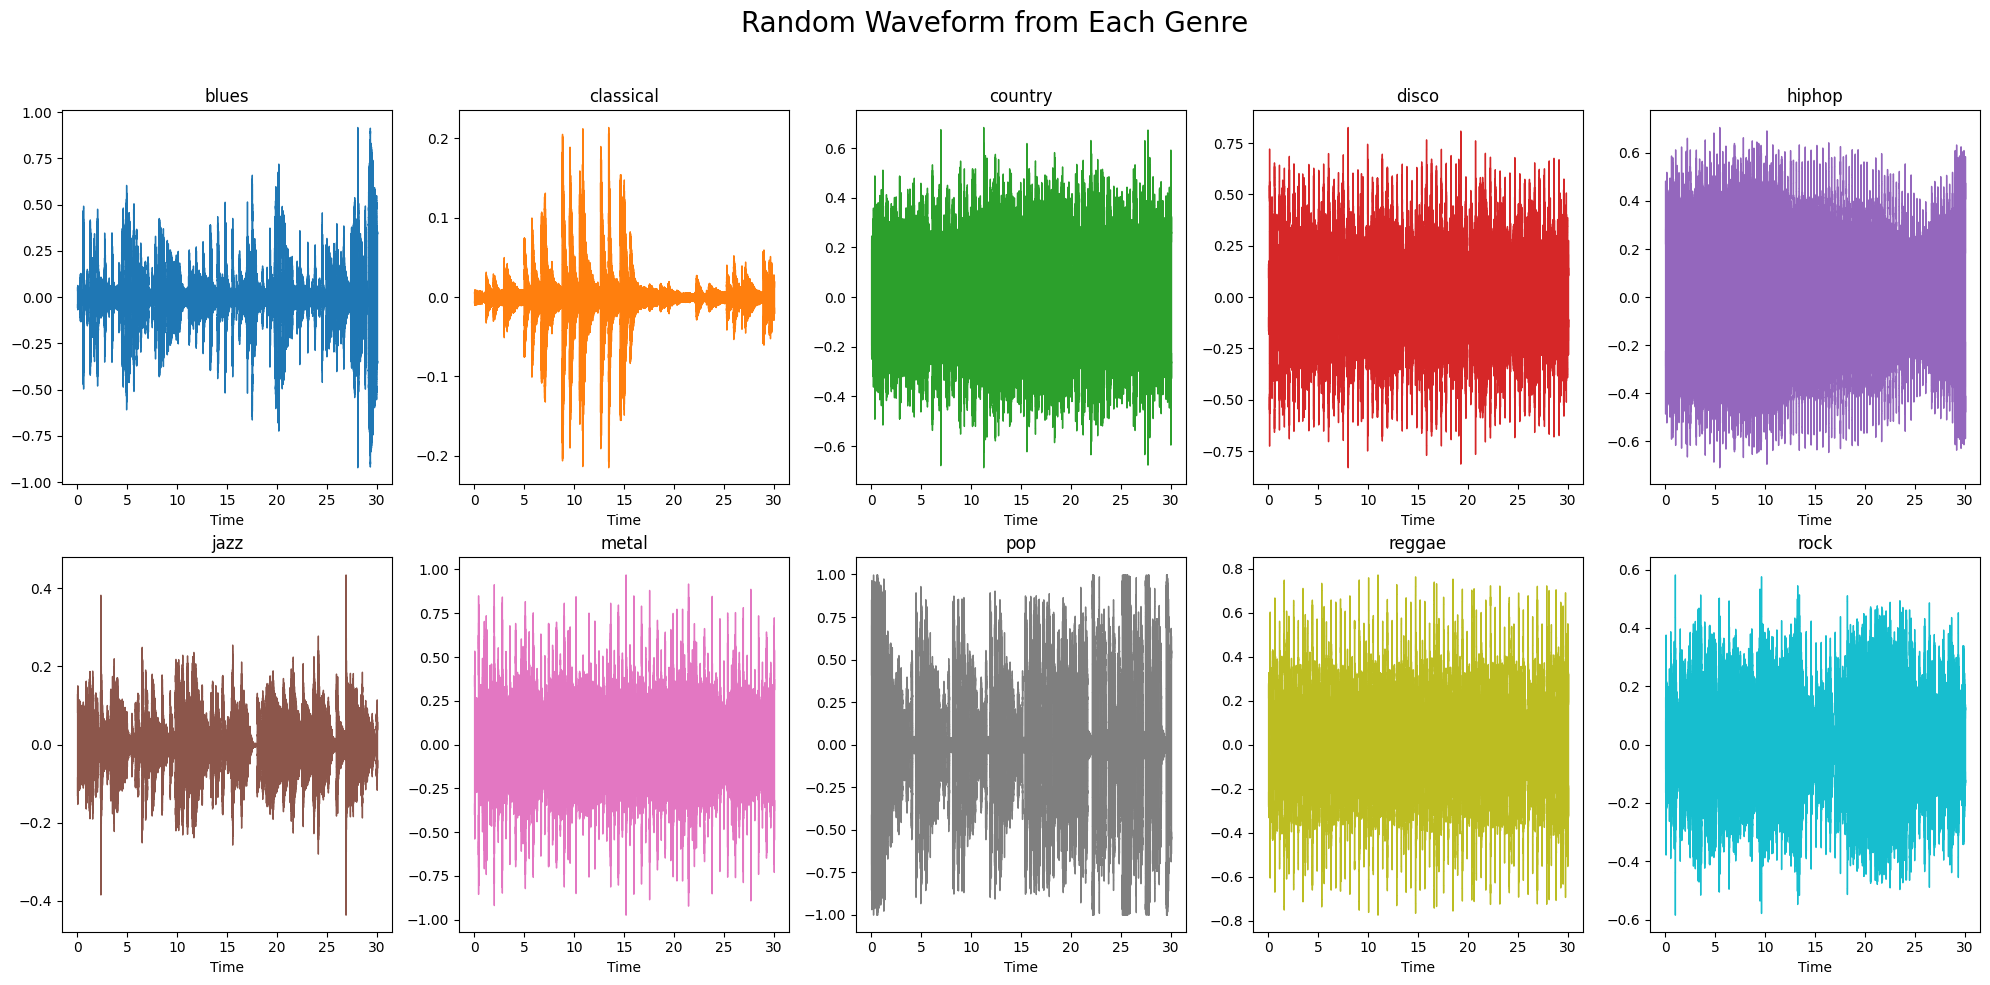

In [4]:
print("\n🎵 Plotting random waveform per genre...")
plot_random_waveform_per_genre()

### Visualizing Mel-Spectrograms

To understand the audio characteristics, plot mel-spectrograms for one random audio file per genre.


📊 Plotting mel-spectrogram for one audio per genre...


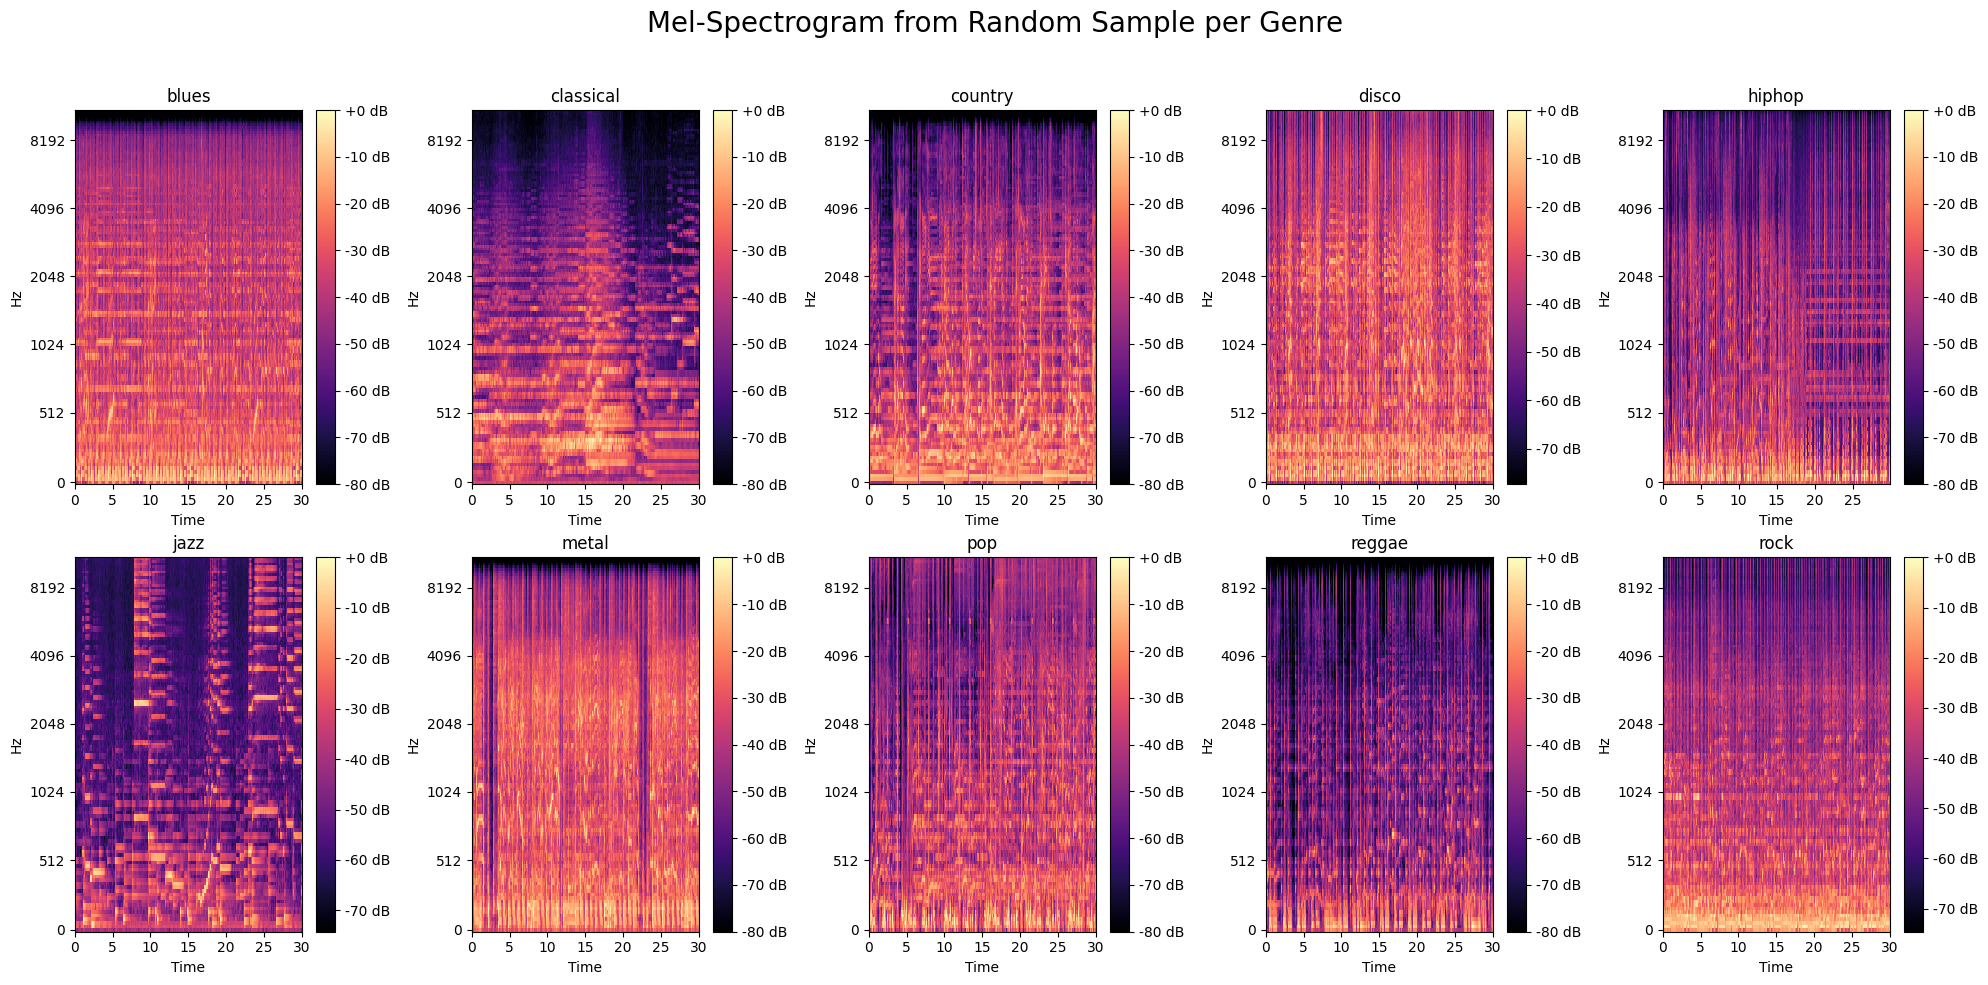

In [5]:
print("\n📊 Plotting mel-spectrogram for one audio per genre...")
plot_random_spectrogram_per_genre()

## Ensure all audio files consistency

For machine learning, audio files must have consistent properties. This section checks and standardizes file formats, sampling rates, durations, and bit depths.

### File Format Check
Verify that all audio files are in the .wav format to avoid format-related issues."

In [ ]:
# Check if all audio files are in .wav format
file_format_check()


--- File Format Check ---
All non-hidden files appear to be in .wav format.


### Basic Statistics
Examine the total number of files and their sampling rates.

In [ ]:
# Display basic statistics: total number of .wav files and sampling rate consistency
basic_statistics()


--- Basic Statistics ---
Total number of .wav files processed: 1000
Sampling rate: 22050 Hz (consistent across all files)


### Checking Audio Durations
Consistent durations are crucial for feature extraction. check the range of durations.

In [ ]:
# Check the durations of audio files
duration()

Duration: Min=29.93s, Max=30.65s, Avg=30.02s
Durations are inconsistent across files.


### Standardizing Audio Durations
To ensure uniformity, trim or pad audio files to a target duration of 30 seconds.

In [ ]:
# Define target duration and directories
target_duration = 30
data_directory = '../data/genres'
processed_data_directory = '../data/processed_audio'

# Preprocess and save audio files with standardized duration
preprocess_and_save_audio(data_directory, processed_data_directory, target_duration)
print("\nPreprocessing complete. Processed audio saved in:", processed_data_directory)

c:\Users\liulj\Desktop\AI\audio-classification\scripts\explore_dataset.py:180: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=None)
c:\Users\liulj\Desktop\AI\audio-classification\.venv\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing ../data/genres\jazz\jazz.00054.wav: 

Preprocessing complete. Processed audio saved in: ../data/processed_audio


### Checking Bit Depths
Confirm that all audio files have the same bit depth for consistent dynamic range.

In [ ]:
# Check the bit depths of audio files
bit_depths()

Bit depth/Subtype: PCM_16 (consistent across all files)


## Conclusion

In this notebook, Explored and preprocessed the GTZAN music genre dataset. 

Key findings and actions include:
- **Exploration**: Confirmed 100 samples per genre and visualized audio properties.
- **Consistency**: Verified .wav format, 22050 Hz sampling rate, and PCM_16 bit depth across all files.
- **Standardization**: Adjusted durations to a uniform 30 seconds, saving processed files to `../data/processed_audio`

    
The dataset is now ready for feature extraction and music genre classification modeling. Note that `jazz.00054.wav` encountered an error, suggesting potential corruption; in practice, this file should be investigated further.